# Life Expectancy and GDP
Written by TheJJSerg, Sug900, Fernando, and CalvinTheMechanic

This is a Codecademy Portfolio Project to use data visualization to analyze and plot data from the World Health Organization and the World Bank to try and identify the relationship between the GDP and life expectancy of six countries.

We will analyze, prepare, and plot data in order to answer questions in a meaningful way. After our analysis, we will be creating a blog post to share our findings on the World Health Organization website.

## Project Objectives
- Complete a project to add to our portfolio
- Use `seaborn` and `Matplotlib` to create visualizations
- Become familiar with presenting and sharing data visualizations
- Preprocess, explore, and analyze data

## Overview of the Data
The dataset, `all_data.csv`, contains the following columns:
- **Country**: nation for a specific observation
- **Year**: the year for the observation
- **Life expectancy at birth (years)**: the life expectancy value in years
- **GDP**: Gross Domestic Product in U.S. dollars

## Method and Analysis
1. Data Loading and Tiding
2. Data Analsyis
3. Data Visualization
4. Others

1. Data Loading and Tiding

In [1]:
#import libraries for the analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

#read csv file into a dataframe
gdp_data = pd.read_csv('all_data.csv')

#print the first 5 rows
print('HEAD OF THE DATAFRAME:')
print('======================')
print(gdp_data.head(),"\n")

#print the info of the df and main stats of the variables
print('INFORMATION ABOUT THE DATAFRAME VARIABLE TYPES & NON-NULL COUNTS:')
print('=================================================================')
print(gdp_data.info(), "\n")
print('DESCRIPTION ABOUT THE DATA:')
print('===========================')
print(gdp_data.describe(include='all'), "\n")

# Analyzing unique values in Country and Year variables
print('INFORMATION ABOUT THE COUNTRY AND YEARS:')
print('=================================================================')
print(f'Unique Value of Country: {gdp_data.Country.unique()}')
print(f'Unique Value of Year: {gdp_data.Year.unique()}', "\n")

# Reduce the large name of United States of America.
gdp_data.loc[gdp_data['Country'] == 'United States of America', 'Country'] = 'USA'

#reduce life expectancy variable name
gdp_data.rename(columns={'Life expectancy at birth (years)': 'Life'}, inplace=True)

# Escale of variable GDP in Billions
gdp_data['GDP'] = (gdp_data['GDP'] / 1e9).round(2)

print('DATAFRAME RENAMED AND TRANSFORMED:')
print('==================================')
print(gdp_data.head())


HEAD OF THE DATAFRAME:
  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10 

INFORMATION ABOUT THE DATAFRAME VARIABLE TYPES & NON-NULL COUNTS:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memor

* The data contains 96 entries with no null values
* The data types are correct as the `Country` variable is a string while the `Life expectancy at birth (years)` and `GDP` are float. The `Year` variable is an integer
* The countries present in the data are: Chile, China, Germany, Mexico, United States of America and Zimbabwe.
* The data were collected between the years 2000 and 2015.
* The data shows no issues with missing data or wrong entries 
* The `Life expectancy at birth (years)` variable was renamed to `Life`
* The `Country` 'United States of America' was rename to USA
* The `GDP` values were scaled to billions to improve interpretation and visualization.

### 2. Exploratory Data Analysis

**Trends**

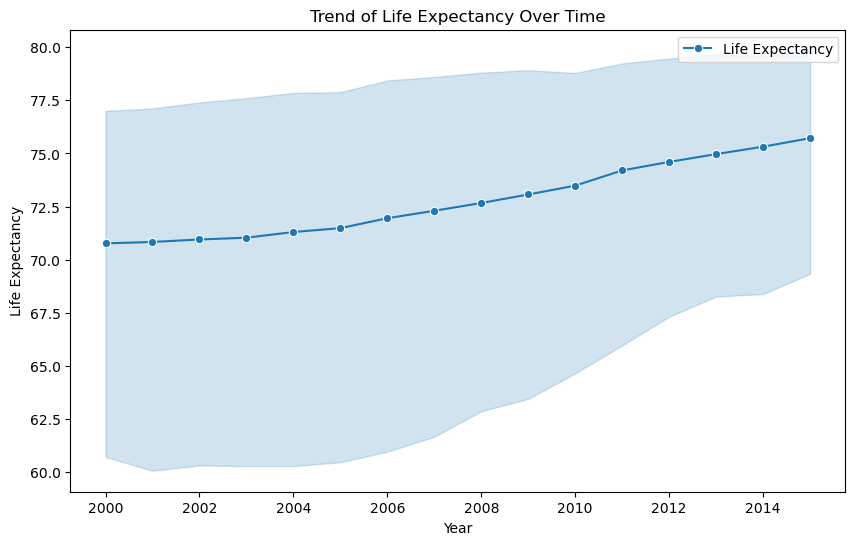

In [9]:
# Trend of Life Expectancy Over Time
plt.figure(figsize=(10, 6))
sn.lineplot(x="Year", y="Life", data=gdp_data, marker='o', label='Life Expectancy')
plt.title('Trend of Life Expectancy Over Time')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.legend()
plt.show()

The trend line is positive and shows that there is a constant growth in life expectancy over the analyzed period, suggesting that there are no significant changes in the countries analyzed.
* The range decreases over time which shows that one or several countries have an overall increase in life expectancies. This is especially shown after the year 2006..

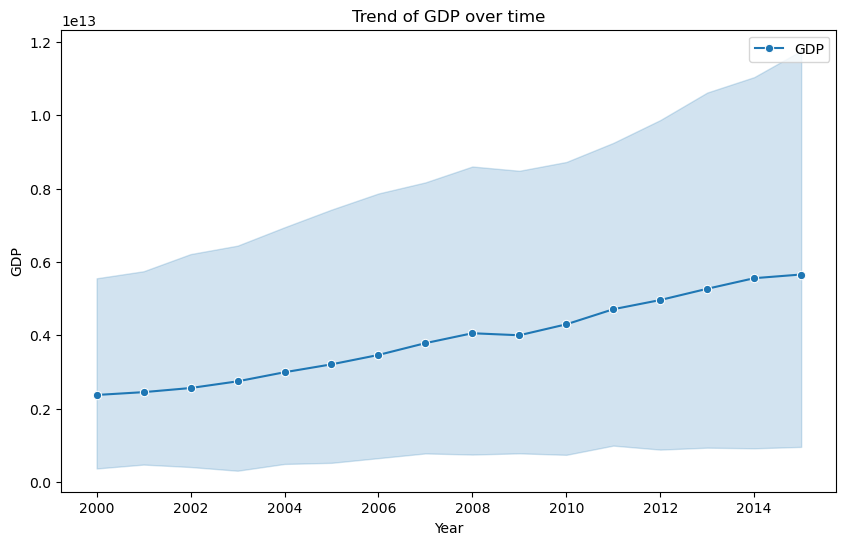

In [14]:
# Trend of GDP over time
plt.figure(figsize=(10, 6))
sn.lineplot(x="Year", y="GDP", data=gdp_data, marker='o', label='GDP')
plt.title('Trend of GDP over time')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.legend()
plt.show()

The GDP trend also shows growth. The growth is generally constant, but there is a slight decrease in GDP from 2008 to 2009.
* It would be interesting to analyze what caused the GDP decrease in 2008 in this group.
* The upper band grows significantly at the end of the period due to an increase in GDP in one or several countries.

**Grouping the variables by Countries** 

In [33]:
# grouping by country
data_grouped = gdp_data.groupby('Country').mean().reset_index()
data_grouped

,Country,Year,Life,GDP
0,Chile,2007.5,78.94375,1.697888e+11
1,China,2007.5,74.26250,4.957714e+12
2,Germany,2007.5,79.65625,3.094776e+12
3,Mexico,2007.5,75.71875,9.766506e+11
4,United States of America,2007.5,78.06250,1.407500e+13
5,Zimbabwe,2007.5,50.09375,9.062580e+09


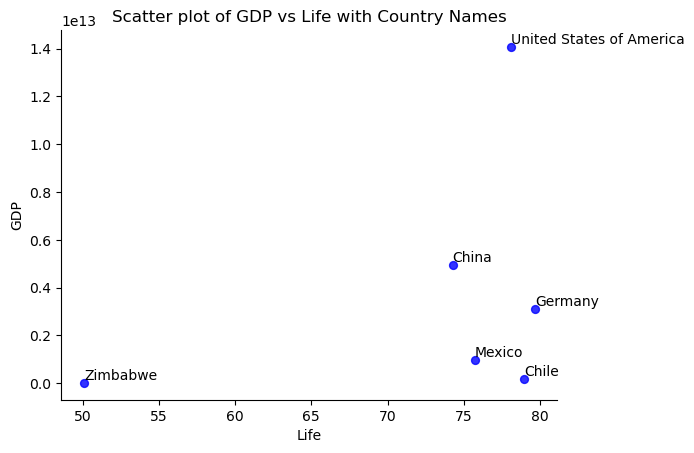

In [34]:
data_grouped.plot(kind='scatter', x='Life', y='GDP', s=32, alpha=.8, color='blue')

for index, row in data_grouped.iterrows():
    plt.text(row['Life'], row['GDP'], row['Country'], horizontalalignment='left', verticalalignment='bottom')

plt.gca().spines[['top', 'right']].set_visible(False)
plt.xlabel('Life')  
plt.ylabel('GDP')   
plt.title('Scatter plot of GDP vs Life with Country Names')  # Añade un título si es necesario
plt.show()

* There is a general trend where countries with a higher GDP also tend to have a higher life expectancy. However, there are exceptions, as can be observed with China, which, despite having a high GDP, does not have the highest life expectancy in the group.

* There is a significant difference in GDP among these countries. The United States, for example, has a much higher GDP than the other countries represented in the graph and not has the best life expectancy.

* Zimbabwe appears to be an outlier in terms of GDP, with a significantly lower value compared to other countries, although its life expectancy is not the lowest of the group, but this are means.

* While countries like Germany and the United States show high levels of GDP and life expectancy, suggesting a correlation between economic development and health, other countries, such as Mexico and Chile, have a relatively high life expectancy but a lower GDP in comparison.

**Calculate the growth ratio**

In the previous graph, we see that life expectancy does not have a direct relationship with GDP, but we can analyze which countries have made better use of this increase in GDP to use it in political and economic actions that increased their Life Expectancy.

In [ ]:
# Calculate the growth percentage using the first year as the base in relation to the last year and the ratio.
def calculate_growth(df):
    df.sort_values('Year', inplace=True)
    initial_life_expectancy = df['Life'].iloc[0]
    initial_GDP = df['GDP'].iloc[0]
    df['Life Growth (%)'] = (df['Life'] / initial_life_expectancy - 1) * 100
    df['GDP Growth (%)'] = (df['GDP'] / initial_GDP - 1) * 100
    df['Ratio'] = df['Life Growth (%)'] / df['GDP Growth (%)'].replace({0:1})
    return df

# group by country and apply the function.
growth_data = gdp_data.groupby('Country', group_keys=False).apply(calculate_growth)

# calculate cumulative growth.
final_growth_data = growth_data.groupby('Country', group_keys=False).nth(-1).reset_index()

# filter the columns
final_growth_percentages = final_growth_data[['Country', 'Life Growth (%)', 'GDP Growth (%)', 'Ratio']]

# print results.
final_growth_percentages.sort_values('Ratio', ascending=False).reset_index(drop=True)

,Country,Life Growth (%),GDP Growth (%),Ratio
0,Zimbabwe,31.956522,143.718552,0.222355
1,Germany,3.846154,73.112644,0.052606
2,United States of America,3.255208,75.728155,0.042985
3,Mexico,2.540107,68.545801,0.037057
4,Chile,4.139715,211.475850,0.019575
5,China,6.136681,813.418913,0.007544


Analysis by countries

Zimbabwe

It shows the highest growth in life expectancy (approximately 31.96%) with a also significant GDP growth (approximately 143.72%). It has the highest ratio (0.222), suggesting that the improvement in life expectancy has been considerable even in the face of its economic growth. This is consistent with studies that claim that in countries with low development, variations in GDP have a greater impact on life expectancy because it directly affects literacy and nutrition of the population, which are two essential aspects in disease prevention impacting mortality.

Alemania

It has a modest growth in life expectancy (approximately 3.85%) with a more moderate economic growth compared to Zimbabwe (approximately 73.11%). The ratio is in the middle (0.0526), indicating a balanced proportion between the economy and health. Since it is a developed country (the second worldwide in this period), the relation between GDP increase and life expectancy is more in line with improving quality of life and public health.

U.S.A

Life expectancy growth is similar to Germany's (approximately 3.26%), with GDP growth also similar (approximately 75.73%). The ratio is slightly lower than that of Germany (0.0429), indicating a less favorable relationship between life expectancy and economic growth. Public health and prevention policies are not adequate, having the highest rates of obesity, tobacco consumption, and other risk factors. There is no doubt that an increase in the GDP budget dedicated to preventing these risk factors would increase the country's life expectancy.

México

It has the lowest growth in life expectancy (approximately 2.54%) compared to the other countries in the table, along with a relatively low GDP growth (approximately 68.55%). With a ratio of 0.037, it indicates that the increase in life expectancy is lower in relation to economic growth. According to estimates by the World Health Organization, life expectancy in Mexico has decreased due to violence, the "war" against drug trafficking, and femicides; deaths from the pandemic are added, and unfortunately, in some states, infant mortality is still high.

Chile

It presents a growth in life expectancy (approximately 4.14%) that is higher than in Mexico and the United States, but its GDP growth is the second highest of all countries in the table (approximately 211.48%). Its ratio is 0.0195, indicating that economic growth has been much higher than the growth in life expectancy, suggesting that factors other than economic growth may be influencing health.

China

Experiences the highest GDP growth of all (approximately 813.42%), which is consistent with its well-known rapid economic development during this period. Although life expectancy has also increased (approximately 6.13%), the ratio is the lowest in the table (0.0075), indicating that the massive GDP growth has not been reflected in an equally massive increase in life expectancy, being on average the country with the lowest life expectancy among developed countries.